# Read data and plot

In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import animation 
import scipy.io as sio
from math import pi,atan,exp,log10
import pandas as pd

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import ticker
from matplotlib.ticker import FuncFormatter


## read .dat and .xg files (excluding conservation.dat and Magnitude_KNEC.dat)

In [3]:

def read_datfile(filename):
    with open(filename,'r') as file:
        lines = file.readlines()
    timelum=[float(lines[i].split()[0]) for i in range(len(lines))]
    value = [float(lines[i].split()[1]) for i in range(len(lines))]
    
    return np.array(timelum),np.array(value)
    
    

def read_file(filename):
    with open(filename,'r') as file:
        lines= file.readlines()
        
    timelum=[];Regionlist=[]
    time_count=0
    for i in range(len(lines)):
        lines[i]=lines[i].split()
        
        if lines[i]==[]:
            continue
        
        elif '"Time' in lines[i]:
            time_count += 1
            timelum.append(float(lines[i][2]))
 
        elif '"Time' not in lines[i] and time_count ==1:
            Regionlist.append(float(lines[i][0]))
        
    
    region_count=len(Regionlist)
    Value=np.zeros((time_count,region_count))
    
    time_count=0
    for i in range(len(lines)):
        
        if lines[i]==[]:
            continue
        
        elif '"Time' in lines[i]:
            time_count += 1
            j=0
 
        elif '"Time' not in lines[i]:
            Value[time_count-1][j]=float(lines[i][1])
            j += 1
        
    return np.array(timelum),np.array(Regionlist),Value

## Used to create movies (e.g. Velocity-Mass changing with time)

In [32]:
def init():
    line.set_data([],[])

    time_text.set_text('')
    return line,time_text

def animate(i):
    # heating efficiency = 0.5
    # global timelum_list,Regionlist_list,Velocity,eth_index
    # time = timelum_list[eth_index][i]
    # time_text.set_text('time = %.1f sec' %time)
    # line.set_data(Regionlist_list[eth_index],Velocity[eth_index][i,:])
    # return line,time_text
    global Time_file1,Region_file1,Velocity_file1_c
    time = Time_file1[i]
    time_text.set_text('time = %.1f sec' %time)
    line.set_data(Region_file1,Velocity_file1_c[i,:])
    return line,time_text

In [ ]:


fig = plt.figure()
#set xlim, ylim
# ax = plt.axes(xlim=(0.0,2e31),ylim=(1e5,1e12))
ax = plt.axes(xlim=(0.0,5.0e31),ylim=(0,1.2))

#ax.set_yscale('log')
ax.grid()
# set xlabel,ylabel,title
ax.set_xlabel('mass[g]')
ax.set_ylabel('Velocity$[c]$')  
ax.set_title('Velocity')
#set line style, legend
line, = ax.plot([],[],lw=2,color='red',label='blh profile\npiston velocity 0.2c, duration 0.01s')
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
ax.legend(frameon=False,loc='lower right')
# set animation time
ani = animation.FuncAnimation(fig,animate,frames=len(Time_file1),interval=20,blit=True,init_func=init)

#ani = animation.FuncAnimation(fig,animate,frames=100,interval=20,blit=True,init_func=init)
# save movie
ani.save('Velocity_blh_piston0.2c0.01s.mp4',fps=30, dpi=900, extra_args=['-vcodec', 'libx264'])


## read Magnitude_KNEC.dat

In [4]:
def read_magnitude(filename):
    with open(filename,'r') as magfile:
        magfile.readline()
        magfile.readline()
        data = magfile.readlines()
    
    n = int(len(data)/2)
    time = np.zeros(n)
    Gemini = np.zeros([n,8])
    CTIO = np.zeros([n,13])
    
    for i in range(n):
        time[i] = float(data[2*i].split()[0])
        Gemini[i,:]=[float(data[2*i].split()[j]) for j in range(1,9)]
        CTIO[i,:]=[float(data[2*i+1].split()[j]) for j in range(0,13)]
        
    return time,Gemini,CTIO
    
    
    
    #Gemini[:,0~7] Gemini 8 bands (ugrizJHKs)
    #CTIO[:,0~12] CTIO 13 bands (BVRIJHKugrizY)
        
        




 ## read conservation.dat
 ### If Thermal Bomb shock injection is turned off in KNEC (do_bomb = .false.):       the number of columns in conservation.dat is 12
 
 #### the order is (energydata[0]~energydata[11]) :
 #### time,Egrav,Eint,Ekin,E1,pdVwork_outer,pdVwork_inner, pdVterm,
 #### energy_from_heating,radiated_energy,E2,E1-E2
 
 
 
  ### If Thermal Bomb shock injection is turned on in KNEC (do_bomb = .true.):       the number of columns in conservation.dat is 13
 
 #### the order is (energydata[0]~energydata[12]) :
 #### time,Egrav,Eint,Ekin,E1,pdVwork_outer,pdVwork_inner, pdVterm,
 #### energy_from_heating,radiated_energy,Eshock,E2,E1-E2
 
 
 
 ### E1 is the total energy of the ejecta (Egrav+Eint+Ekin)
 ### E2 is E1(t=0) + Eheating + pdVterm (+Eshock) - Eradiation
 ### E1 = E2 means energy conservation

In [1]:
def read_conservation(filename):
    do_bomb = False
    if (do_bomb):
        n_columns = 13
    else:
        n_columns = 12
    
    with open(filename,'r') as file:
        file.readline()
        file.readline()
        data=file.readlines()
    
    energydata = np.zeros([len(data),n_columns])

    for i in range(len(data)):
        energydata[i,:] = np.array([float(j) for j in data[i].split()])
    
    return energydata


In [7]:
!ls

Data_DD2_Apr2_zb
Data_blh_Apr2_zb
Data_sfho_Apr2_zb
Data_wind310T6_0.01M_0.2c_ye0.1_s10_tau10_Apr2_zb
Data_wind310T6_0.01M_0.2c_ye0.4_s10_tau10_Apr2_zb
E1E2
Energy
energy_conservation.ipynb
plot.ipynb


In [5]:

file1 = "Data_blh_Apr2_zb"


 By default, kNEC starts to output .dat files at an early time (1e-3s). However, luminosity (lum_observed, lum_photo) is an exception. kNEC will output luminosity when the location of photosphere is resolved (index of photosphere < imax -5, usually ~ 1000s). Therefore, I use timelum_file1 and timeearly_file1 to store the data respectively.

In [17]:
#_,dmass = read_datfile(file1+'/delta_mass_initial.dat')
timelum_file1,lum_observed_file1 = read_datfile(file1+'/lum_observed.dat') 
_,lum_photo_file1 = read_datfile(file1+'/lum_photo.dat')

#lum_radioactive_file1 = lum_observed_file1 - lum_photo_file1
timeearly_file1,radius_photo_file1 = read_datfile(file1+'/rad_photo.dat')
_,index_photo_file1 = read_datfile(file1+'/index_photo.dat')
_,Teff_file1 = read_datfile(file1+'/T_eff.dat')
_,index_lumshell_file1 = read_datfile(file1+'/index_lumshell.dat')
_,radius_max_file1 = read_datfile(file1+'/rad_max.dat')
_,heating1_file1 = read_datfile(file1+'/heating_rate_1.dat')


timemag_file1,Gemini_file1,CTIO_file1 = read_magnitude(file1+'/Magnitude_KNEC.dat')
energydata_file1 = read_conservation(file1+'/conservation.dat')


Time_file1,Region_file1,Velocity_file1 = read_file(file1+'/vel.xg')
_,_,Radius_file1 = read_file(file1+'/radius.xg')
_,_,Temperature_file1 = read_file(file1+'/temp.xg')
_,_,Heatingrate_file1 = read_file(file1+'/heating_rate.xg')
_,_,Rho_file1 = read_file(file1+'/rho.xg')


array([0.00000000e+00, 1.26658720e+03, 2.00123563e+03, ...,
       2.99817676e+06, 2.99912676e+06, 3.00000000e+06])

In [20]:

timelum_file1_day = timelum_file1/(24*3600)
timeearly_file1_day = timeearly_file1/(24*3600)
timemag_file1_day = timemag_file1/(24*3600)
i_file1 = np.where(index_photo_file1==1)[0][0]

print("photosphere falls onto inner boundary at [day]: ",timelum_file1_day[i_file1])


photosphere falls onto inner boundary at [day]:  17.952971766203703


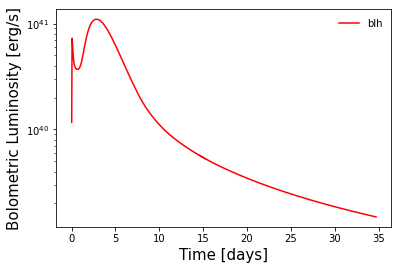

In [21]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.plot(timelum_file1_day[1:],lum_observed_file1[1:],'r',linestyle='-',label='blh')



ax1.legend(frameon=False)

ax1.set_xlabel('Time [days]',fontsize=15)
ax1.set_ylabel('Bolometric Luminosity [erg/s]',fontsize=15)


ax1.set_yscale('log')



## Phososphere Radius

Text(0, 0.5, 'Photosphere Radius [cm]')

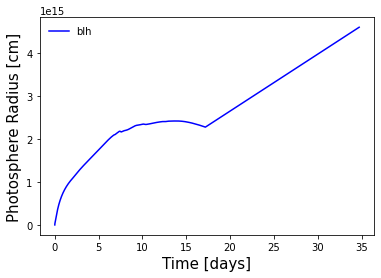

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.plot(timeearly_file1_day[:],radius_photo_file1[:],'b',linestyle='-',label='blh')

ax1.legend(frameon=False)

ax1.set_xlabel('Time [days]',fontsize=15)
ax1.set_ylabel('Photosphere Radius [cm]',fontsize=15)


## Teff at photosphere

In [24]:
i_start_file1 = np.where(timeearly_file1_day>=0.1)[0][0]


No handles with labels found to put in legend.


Text(10, 4000, '($4 \\pi R_{ph}^2 \\sigma_{SB} T_{eff}^4 = L_{ph}$)')

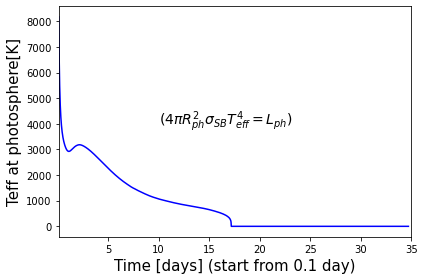

In [27]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.plot(timeearly_file1_day[i_start_file1:],Teff_file1[i_start_file1:],'b',linestyle='-',label='')

ax1.legend(frameon=False)

ax1.set_xlabel('Time [days] (start from 0.1 day)',fontsize=15)
ax1.set_ylabel('Teff at photosphere[K]',fontsize=15)

ax1.set_xlim([0.1,35])
plt.tight_layout()

plt.text(10,4000,'($4 \pi R_{ph}^2 \sigma_{SB} T_{eff}^4 = L_{ph}$)',fontsize=14)



## Boundary Velocity

In [28]:
Velocity_file1_c = Velocity_file1/3e10


No handles with labels found to put in legend.


Text(0, 0.5, 'Velocity [c]')

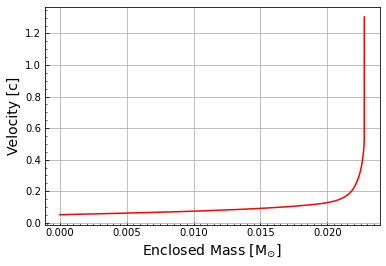

In [30]:
Msun = 2e33
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(Region_file1/Msun,Velocity_file1_c[-1,:],'r-',label='')

ax1.grid()

#plt.tick_params(top='off',bottom='on',left='on',right='on')

matplotlib.rcParams['xtick.direction'] = 'in' 
matplotlib.rcParams['ytick.direction'] = 'in' 
ax1.xaxis.set_minor_locator(MultipleLocator(0.0005))
ax1.yaxis.set_minor_locator(MultipleLocator(0.05))

ax1.legend(frameon=False,fontsize=14)

ax1.set_xlabel('Enclosed Mass [M$_{\odot}$]',fontsize=14)
ax1.set_ylabel('Velocity [c]',fontsize=14)

#plt.savefig('Velocity_wind310Tx.png',dpi=400)



'Data_wind310T6_0.01M_0.2c_ye0.1_s10_tau10_Apr2_piston0.167c0.1s'

## Energy Conservation

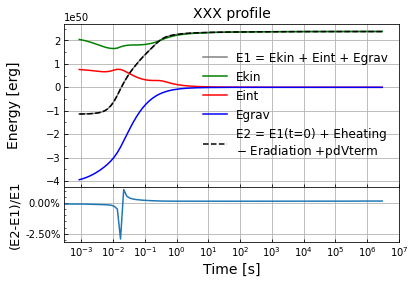

In [37]:
#  time,egrav,eint,ekin,E1,pdVwork_outer,pdVwork_inner, pdVterm,
#     energy_from_heating,radiated_energy,E2,E1-E2

def plot_conservation(energydata_file):

    fig,ax = plt.subplots(2,1,gridspec_kw={
                           'height_ratios': [3, 1]})
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0)
    time = energydata_file[:,0]
    E1 = energydata_file[:,4]
    E2 = energydata_file[:,-2]
    
    ax[0].plot(time[1:],E1[1:],color='grey',linestyle='-',label='E1 = Ekin + Eint + Egrav')
    ax[0].plot(time[1:],energydata_file[1:,3],'g-',label='Ekin')
    ax[0].plot(time[1:],energydata_file[1:,2],'r-',label='Eint')
    ax[0].plot(time[1:],energydata_file[1:,1],'b-',label='Egrav')

    ax[0].plot(time[1:],E2[1:],color='k',linestyle='--',label='E2 = E1(t=0) + Eheating\n$-$ Eradiation +pdVterm')
    
   
    ax[0].set_xscale('log')
    ax[0].set_xticks(10**np.linspace(-3,7,11))
    plt.setp(ax[0].get_xticklabels(), visible=False)
    ax[0].set_ylabel('Energy [erg]',fontsize=14)
#     ax[0].xaxis.set_visible(0)
    
    #ax1.set_yscale('log')
    ax[0].legend(frameon=False,fontsize=12,loc='center right')
    ax[0].grid()
    ax[0].yaxis.set_minor_locator(MultipleLocator(0.5e50))
    
    dE_relative = (E1-E2)/E1
    ax[1].plot(time,dE_relative)
    ax[1].set_xscale('log')
    ax[1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y))) 
    #ax[1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=0.02,xmin=-0.035,decimals=1))
#     ax[1].set_ylim([-0.035,0.02])
    ax[1].yaxis.set_minor_locator(MultipleLocator(0.005))
    
    ax[1].set_xticks(10**np.linspace(-3,7,11))
    ax[1].grid()
    
    ax[1].set_ylabel('(E2-E1)/E1',fontsize=13)
    
    ax[1].set_xlabel('Time [s]',fontsize=14)
    matplotlib.rcParams['xtick.direction'] = 'in' 
    matplotlib.rcParams['ytick.direction'] = 'in'
    
    fig.align_labels()  
    ax[0].set_title('XXX profile',fontsize=14)
    

plot_conservation(energydata_file1)





Data_blh_Apr2_zb


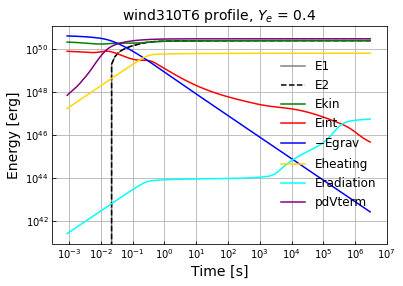

In [38]:
#  time,egrav,eint,ekin,E1,pdVwork_outer,pdVwork_inner, pdVterm,
#     energy_from_heating,radiated_energy,E2,E1-E2

def plot_conservation(energydata_file):

#     fig,ax = plt.subplots(2,1,gridspec_kw={
#                            'height_ratios': [3, 1]})
    fig = plt.figure()
    ax = fig.add_subplot(111)
    time = energydata_file[:,0]
    E1 = energydata_file[:,4]
    E2 = energydata_file[:,-2]
    
    ax.plot(time[1:],E1[1:],color='grey',linestyle='-',label='E1')
    ax.plot(time[1:],E2[1:],color='k',linestyle='--',label='E2')
    
    ax.plot(time[1:],energydata_file[1:,3],'g-',label='Ekin')
    ax.plot(time[1:],energydata_file[1:,2],'r-',label='Eint')
    ax.plot(time[1:],-energydata_file[1:,1],'b-',label='$-$Egrav')
    
    ax.plot(time[1:],energydata_file[1:,-4],color='gold',linestyle='-',label='Eheating')
    ax.plot(time[1:],energydata_file[1:,-3],color='cyan',linestyle='-',label='Eradiation')
    ax.plot(time[1:],energydata_file[1:,7],color='purple',linestyle='-',label='pdVterm')
#     ax.plot(time[1:],energydata_file[1:,6],color='purple',linestyle='--',label='pdV inner')
    
    

    
   
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    ax.set_xticks(10**np.linspace(-3,7,11))
    ax.set_ylabel('Energy [erg]',fontsize=14)
#     ax[0].xaxis.set_visible(0)
    
    ax.legend(frameon=False,fontsize=12,loc='center right')
    ax.grid()
#     ax.yaxis.set_minor_locator(MultipleLocator(0.05e50))
    
    matplotlib.rcParams['xtick.direction'] = 'in' 
    matplotlib.rcParams['ytick.direction'] = 'in'
    
    ax.set_title('wind310T6 profile, $Y_e$ = 0.4',fontsize=14)
    
    ax.set_xlabel('Time [s]',fontsize=14)
    #plt.savefig('logEnergy_wind310T6_ye0.4.png',dpi=600)
    
plot_conservation(energydata_file1)

print(file1)




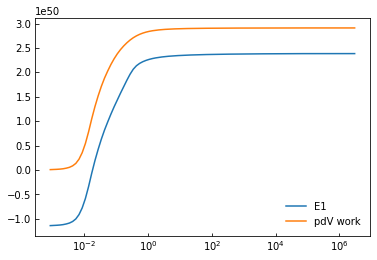

In [39]:


plt.plot(energydata_file1[1:,0],energydata_file1[1:,4],label='E1')
plt.plot(energydata_file1[1:,0],energydata_file1[1:,7],label='pdV work')

plt.xscale('log')
# plt.yscale('log')
plt.legend(frameon=False)



## Heating rate




## Read Ye at photosphere, lumshell

In [41]:
iniye_file1 = pd.read_csv(file1+'/initial_Ye.dat',header=None,sep='\s+')[1]
iniye_file1 = np.array(iniye_file1)

index_photo_file1 = index_photo_file1.astype(int)
index_photo_file1[-1] = 1000

index_lumshell_file1 = index_lumshell_file1.astype(int)
index_lumshell_file1[-1] = 1000


ye_ph_file1 = iniye_file1[index_photo_file1-1]

ye_lumshell_file1 = iniye_file1[index_lumshell_file1-1]


array([   0, 1000, 1000, ...,    1,    1, 1000])

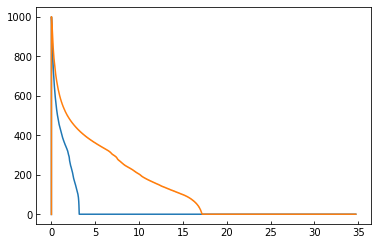

In [42]:
plt.plot(timeearly_file1[:-1]/24/3600,index_lumshell_file1[:-1])
plt.plot(timeearly_file1[:-1]/24/3600,index_photo_file1[:-1])

#plt.plot(timeearly_file3[:-1],ye_ph_file3[:-1])

## Multicolor light curves

In [43]:



def plotmag1(timemag_file1_day,Gemini_file1):  #(solid lines)

    #plt.figure()

    #plt.xlabel('time[days]')
    #plt.ylabel('AB Mag (Distance = 40Mpc)')

    #plt.title('AB Magnitude (Gemini u g r i z J H Ks)')
    plt.xlim([0,15])
    plt.ylim([13,30])
    #plt.xscale('log')
    
    plt.tick_params(top='off',bottom='on',left='on',right='on')

    matplotlib.rcParams['xtick.direction'] = 'in' 
    matplotlib.rcParams['ytick.direction'] = 'in' 
    plt.plot(timemag_file1_day,Gemini_file1[:,0],color='royalblue',label='u')
    plt.plot(timemag_file1_day,Gemini_file1[:,1],color='limegreen',label='g')
    plt.plot(timemag_file1_day,Gemini_file1[:,2],color='gold',label='r')
    plt.plot(timemag_file1_day,Gemini_file1[:,3],color='orange',label='i')
    plt.plot(timemag_file1_day,Gemini_file1[:,4],color='darkorange',label='z')
    plt.plot(timemag_file1_day,Gemini_file1[:,5],color='salmon',label='J')
    plt.plot(timemag_file1_day,Gemini_file1[:,6],color='indianred',label='H')
    plt.plot(timemag_file1_day,Gemini_file1[:,7],color='red',label='Ks')

    plt.legend(frameon=False)

    plt.gca().invert_yaxis()
    
    
    

def plotmag2(timemag_file1_day,Gemini_file1):  #(dashed lines)

  
    #plt.title('AB Magnitude (Gemini u g r i z J H Ks)')
    plt.xlim([0,15])
    #plt.xscale('log')
    plt.ylim([13,30])
    plt.tick_params(top='off',bottom='on',left='on',right='on')

    matplotlib.rcParams['xtick.direction'] = 'in' 
    matplotlib.rcParams['ytick.direction'] = 'in' 
    plt.plot(timemag_file1_day,Gemini_file1[:,0],color='royalblue',linestyle='--',label='u')
    plt.plot(timemag_file1_day,Gemini_file1[:,1],color='limegreen',linestyle='--',label='g')
    plt.plot(timemag_file1_day,Gemini_file1[:,2],color='gold',linestyle='--',label='r')
    plt.plot(timemag_file1_day,Gemini_file1[:,3],color='orange',linestyle='--',label='i')
    plt.plot(timemag_file1_day,Gemini_file1[:,4],color='darkorange',linestyle='--',label='z')
    plt.plot(timemag_file1_day,Gemini_file1[:,5],color='salmon',linestyle='--',label='J')
    plt.plot(timemag_file1_day,Gemini_file1[:,6],color='indianred',linestyle='--',label='H')
    plt.plot(timemag_file1_day,Gemini_file1[:,7],color='red',linestyle='--',label='Ks')

    plt.gca().invert_yaxis()





Text(0.5, 1.0, 'XXX profile')

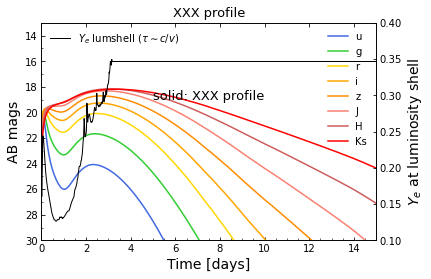

In [49]:


plotmag1(timemag_file1/(24*3600),Gemini_file1)
# plotmag2(timemag_file2/(24*3600),Gemini_file2)

plt.text(5,19,'solid: XXX profile',fontsize=13)

#plt.title('AB mags',fontsize=13)
plt.xlabel('Time [days]',fontsize=14) 
plt.ylabel('AB mags',fontsize=14)

ax1 = plt.gca()
ax1.yaxis.set_minor_locator(MultipleLocator(1))
ax1.xaxis.set_minor_locator(MultipleLocator(0.5))


ax2 = ax1.twinx()
#ax2.plot(timeearly_file1_day,ye_ph_file1,'k-',linewidth=1.0,label=r'$Y_e$ photosphere ($\tau \sim 2/3$)')
ax2.plot(timeearly_file1_day,ye_lumshell_file1,'k-',linewidth=1.0,label=r'$Y_e$ lumshell ($\tau \sim c/v$)')
ax2.set_ylim([0.1,0.4])
# ax2.plot(timeearly_file2_day,ye_lumshell_file2,'k--',linewidth=1.0)
ax2.legend(frameon=False,loc='upper left')
ax2.set_ylabel('$Y_e$ at luminosity shell',fontsize=14)
#ax2.set_ylabel('$Y_e$ at photosphere',fontsize=14)

plt.title('XXX profile',fontsize=13)
# ax2.yaxis.set_minor_locator(MultipleLocator(0.01))
#plt.savefig('ABmags_blh-mvel2_homo_zb.png',bbox_inches='tight',dpi=600)
